مبحث رگرسیون خطی
Mohsenpourian@gmail.com

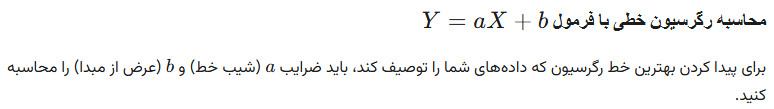

In [1]:
# محاسبه رگرسیون خطی برای داده‌های ساعات مطالعه و نمره امتحان
# داده‌ها: X (ساعات مطالعه) و Y (نمره امتحان)
#X = [10, 20, 30, 40, 50]
#Y = [30, 55, 60, 70, 90]

X = [1, 2, 3, 4, 5]
Y = [30, 55, 60, 70, 90]

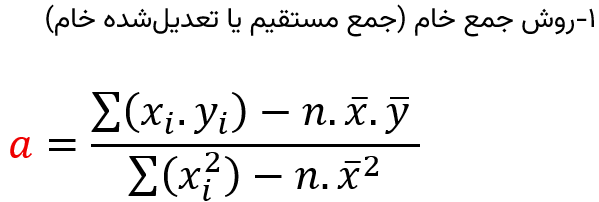

In [2]:
 # روش جمع خام (فرمول جمع مستقیم یا فرمول تعدیل‌شده خام)
def method_raw_sums(X, Y):
    n = len(X)
    mean_X = sum(X) / n
    mean_Y = sum(Y) / n
    sum_xy = sum(X[i] * Y[i] for i in range(n))
    sum_x2 = sum(X[i] * X[i] for i in range(n))
    print("sum_xy:" , sum_xy)
    print("sum_x2:" , sum_x2)
    numerator = sum_xy - n * mean_X * mean_Y
    denominator = sum_x2 - n * (mean_X ** 2)
    print ("numerator  :", numerator)
    print ("denominator:", denominator)

    return numerator / denominator

print("Raw Sums - (a):", method_raw_sums(X, Y))


sum_xy: 1050
sum_x2: 55
numerator  : 135.0
denominator: 10.0
Raw Sums - (a): 13.5


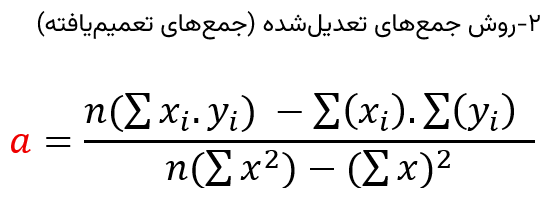

In [3]:
#----------------------------------------------------
# روش جمع‌های تعدیل‌شده (فرمول جمع‌های تعمیم‌یافته)
def method_adjusted_sums(X, Y):
    n = len(X)
    sum_xy = sum(x * y for x, y in zip(X, Y))
    sum_x = sum(X)
    sum_y = sum(Y)
    sum_x2 = sum(x * x for x in X)
    numerator = n * sum_xy - sum_x * sum_y
    denominator = n * sum_x2 - (sum_x) ** 2
    return numerator / denominator
print("Adjusted Sums:", method_adjusted_sums(X, Y))


Adjusted Sums: 13.5


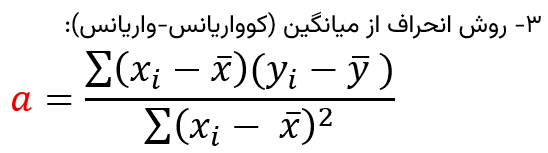

In [4]:
#----------------------------------------------------
# روش انحراف از میانگین (فرمول کوواریانس-واریانس)
def method_deviation_from_mean(X, Y):
    n = len(X)
    mean_X = sum(X) / n
    mean_Y = sum(Y) / n
    numerator = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n))
    denominator = sum((X[i] - mean_X) ** 2 for i in range(n))
    return numerator / denominator
#----------------------------------------------------
print("Deviation from Mean:", method_deviation_from_mean(X, Y))

Deviation from Mean: 13.5


In [5]:
print("1.Raw Sums:", method_raw_sums(X, Y))
print("2.Adjusted Sums:", method_adjusted_sums(X, Y))
print("3.Deviation from Mean:", method_deviation_from_mean(X, Y))
a= method_raw_sums(X, Y)

sum_xy: 1050
sum_x2: 55
numerator  : 135.0
denominator: 10.0
1.Raw Sums: 13.5
2.Adjusted Sums: 13.5
3.Deviation from Mean: 13.5
sum_xy: 1050
sum_x2: 55
numerator  : 135.0
denominator: 10.0


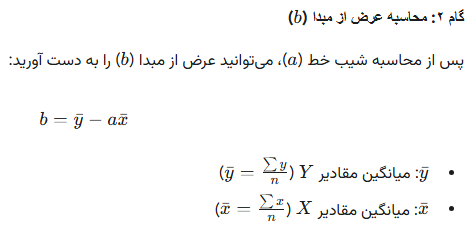

In [6]:
# محاسبه عرض از مبدا (b)
# b = ȳ - a * x̄
n = len(X)
mean_X = sum(X) / n
mean_Y = sum(Y) / n
b = mean_Y - a * mean_X
print ("b:",b)

b: 20.5


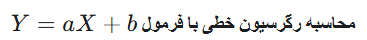

In [7]:
print(f"Slope (a): {a}")
print(f"Y-intercept (b): {b}")
print(f"Regression equation: Y = {a:.2f}X + {b:.2f}")

Slope (a): 13.5
Y-intercept (b): 20.5
Regression equation: Y = 13.50X + 20.50


X (x):  [1, 2, 3, 4, 5]
Y (y):  [30, 55, 60, 70, 90]
Slope (a): 13.5
Y-intercept (b): 20.5
Regression equation:  Y = 13.50X + 20.50


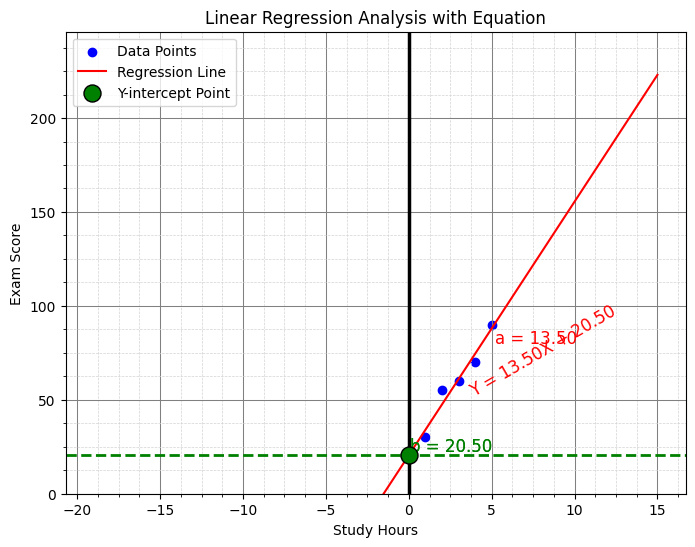

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Constants for ANSI escape codes
RED = '\033[91m'
BLUE = '\033[94m'
GREEN = '\033[92m'
BOLD = '\033[1m'
END = '\033[0m'

print(f"X (x): {BOLD} {BLUE}{X}{END}")
print(f"Y (y): {BOLD} {BLUE}{Y}{END}")

print(f"Slope (a): {RED}{a}{END}")
print(f"Y-intercept (b): {GREEN}{b}{END}")
print(f"Regression equation: {BOLD} Y = {a:.2f}X + {b:.2f}{END}")

# Add plotting functionality
# Convert lists to numpy arrays for easier plotting
X_np = np.array(X)
Y_np = np.array(Y)

# Create a new range of x-values to extend the regression line
X_line = np.linspace(min(X)-20, max(X)+10, 100)  # از 10 تا 50
Y_pred = a * X_line + b

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the original data points
plt.scatter(X_np, Y_np, color='blue', label='Data Points')

# Plot the extended regression line
plt.plot(X_line, Y_pred, color='red', label=f'Regression Line')

# Add a text label for the regression equation directly on the line
plt.text(x=3.5, y=50, s=f'Y = {a:.2f}X + {b:.2f}', color='red', fontsize=12,
         ha='left', va='bottom', rotation=30)

# Highlight the y-intercept (b)
plt.axvline(x=0, color='black', linewidth=2.5)
plt.axhline(y=b, color='green', linestyle='--', linewidth=2)
plt.scatter(0, b, color='green', s=150, zorder=5, edgecolors='black', label='Y-intercept Point')
plt.text(x=0.1, y=b, s=f'b = {b:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a text label for the y-intercept
plt.text(x=0.1, y=b, s=f'b = {b:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a text label for the slope (a)
plt.text(x=5.2, y=80, s=f'a = {a:.2f}', color='red', fontsize=12)

# Set plot limits and labels
plt.ylim(ymin=0)
plt.title('Linear Regression Analysis with Equation')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')

# Display legend and grid
plt.legend()
# Activate minor ticks
plt.minorticks_on()

# Set number of minor ticks between major ticks
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(4))  # 4 minor intervals → 3 minor ticks
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(4))

# Customize gridlines
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.75)
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)
plt.grid(True)

# Show the plot
plt.show()

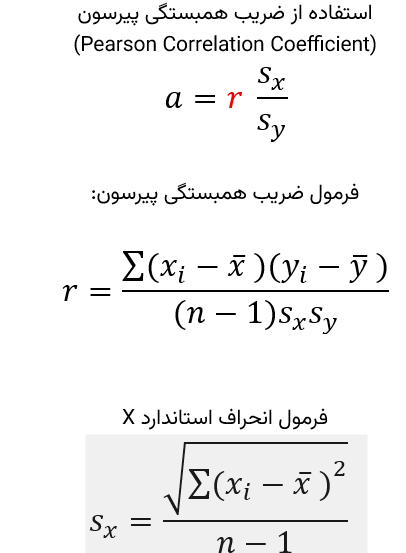

روش محاسبه شیب خط از طریق محاسبه ضریب همبستگی پیرسون و انحراف استاندارد دو متغییر

In [9]:
import numpy as np

# داده‌ها
X = np.array([10, 20, 30, 40, 50])
Y = np.array([30, 55, 60, 70, 90])

# میانگین و انحراف معیار
X_mean = np.mean(X)
Y_mean = np.mean(Y)
sigma_X = np.std(X, ddof=0)
sigma_Y = np.std(Y, ddof=0)

# ضریب همبستگی پیرسون
r = np.corrcoef(X, Y)[0,1]
# محاسبه شیب
a = r * (sigma_Y / sigma_X)
# محاسبه عرض از مبداء
b = Y_mean - a * X_mean

# خط رگرسیون
X_line = np.linspace(min(X)-5, max(X)+5, 100)
Y_line = a * X_line + b

print(f"Slope (a): {a}")
print(f"Y-intercept (b): {b}")
print(f"Regression equation: Y = {a:.2f}X + {b:.2f}")

Slope (a): 1.3499999999999999
Y-intercept (b): 20.500000000000007
Regression equation: Y = 1.35X + 20.50


In [10]:
# روش 2: استفاده از NumPy برای تأیید
import numpy as np

# تبدیل داده‌ها به آرایه NumPy
X_np = np.array(X)
Y_np = np.array(Y)

# محاسبه ضرایب با استفاده از numpy.polyfit (درجه 1 برای خطی)
coeffs = np.polyfit(X_np, Y_np, 1)
a_np, b_np = coeffs  # a_np: شیب، b_np: عرض از مبدا

# محاسبه SSE با NumPy
Y_pred_np = b_np + a_np * X_np
sse_np = np.sum((Y_np - Y_pred_np) ** 2)

print("\nروش NumPy:")
print(f"شیب (a): {a_np}")
print(f"عرض از مبدا (b): {b_np}")
print(f"معادله خط: Y = {a_np}X + {b_np}")
print(f"مجموع مربعات خطاها (SSE): {sse_np}")


روش NumPy:
شیب (a): 1.3499999999999999
عرض از مبدا (b): 20.499999999999986
معادله خط: Y = 1.3499999999999999X + 20.499999999999986
مجموع مربعات خطاها (SSE): 97.49999999999986


In [11]:
# محاسبه رگرسیون خطی برای داده‌های ساعات مطالعه و نمره امتحان
# داده‌ها: X (ساعات مطالعه) و Y (نمره امتحان)
# روش 3: استفاده از scikit-learn

from sklearn.linear_model import LinearRegression

# آماده‌سازی داده‌ها برای scikit-learn (تبدیل X به آرایه دو بعدی)
X_sk = np.array(X).reshape(-1, 1)
Y_sk = np.array(Y)

# ایجاد و آموزش مدل رگرسیون خطی
# Ordinary least squares Linear Regression.
model = LinearRegression()



#----------------------------------------------------
model.fit(X_sk, Y_sk)
#----------------------------------------------------




# استخراج ضرایب
# learned attributes | fitted attributes
a_sk = model.coef_[0]  # شیب
b_sk = model.intercept_  # عرض از مبدا

#----------------------------------------------------
Y_pred_sk = model.predict(X_sk)
#----------------------------------------------------
# محاسبه SSE
sse_sk = np.sum((Y_sk - Y_pred_sk) ** 2)

print(f"X (x): {BOLD} {BLUE}{X}{END}")
print(f"Y (y): {BOLD} {BLUE}{Y}{END}")
print("\nscikit-learn method:")
print(f"Slope (a): {a_sk}")
print(f"Intercept (b): {b_sk}")
print(f"Line equation: Y = {a_sk}X + {b_sk}")
print(f"Sum of Squared Errors (SSE): {sse_sk}")

X (x):  [10 20 30 40 50]
Y (y):  [30 55 60 70 90]

scikit-learn method:
Slope (a): 1.35
Intercept (b): 20.5
Line equation: Y = 1.35X + 20.5
Sum of Squared Errors (SSE): 97.5


رگرسیون خطی دوگانه و چندگانه


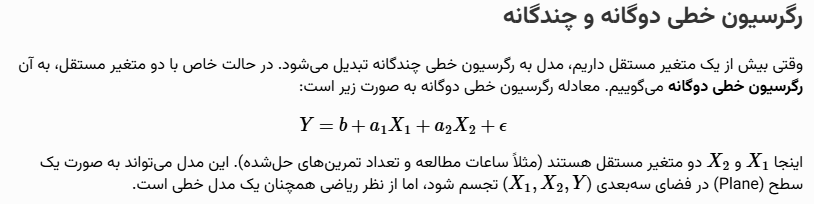

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

# داده‌ها
# [تعداد تمرین حل شده ، تعداد ساعات مطالعه]
#X = np.array([[10, 2], [20, 3], [30, 4], [40, 5], [50, 6]])  # [X_1, X_2]
X1 = np.array([10, 20, 30, 40, 50])  # Study hours
X2 = np.array([2, 3, 4, 5, 6])       # Number of exercises

X = np.column_stack((X1, X2))        # Combine X1 and X2 into a 2D array
Y = np.array([30, 55, 65, 70, 80])   # Exam score
print(X)
# ایجاد و آموزش مدل رگرسیون خطی
model = LinearRegression()
model.fit(X, Y)

# استخراج ضرایب
a1, a2 = model.coef_ # ضرایب X_1 و X_2
b = model.intercept_  # عرض از مبدا




# محاسبه SSE
Y_pred = model.predict(X)
sse = np.sum((Y - Y_pred) ** 2)

print(f"شیب برای X_1 (a1): {a1}")
print(f"شیب برای X_2 (a2): {a2}")
print(f"عرض از مبدا (b): {b}")
print(f"معادله خط: Y = {a1:.2f} X1 + {a2:.2f} X2 + {b:.2f}")
print(f"مجموع مربعات خطاها (SSE): {sse:.2f}")

[[10  2]
 [20  3]
 [30  4]
 [40  5]
 [50  6]]
شیب برای X_1 (a1): 1.1386138613861396
شیب برای X_2 (a2): 0.11386138613861398
عرض از مبدا (b): 25.386138613861355
معادله خط: Y = 1.14 X1 + 0.11 X2 + 25.39
مجموع مربعات خطاها (SSE): 127.50


Regression Equation: Y = 1.1386 * X₁ + 0.1139 * X₂ + 25.3861


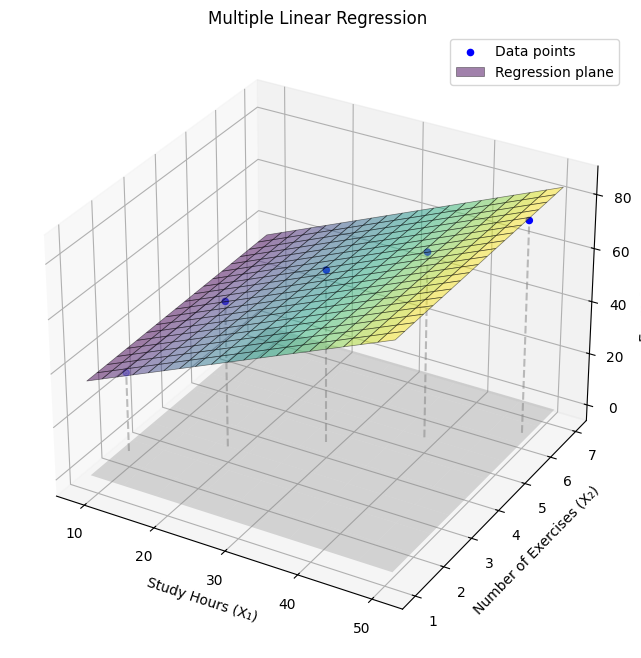

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Data
X1 = np.array([10, 20, 30, 40, 50])  # Study hours
X2 = np.array([2, 3, 4, 5, 6])       # Number of exercises
Y = np.array([30, 55, 65, 70, 80])   # Exam score

# Prepare data for scikit-learn
X = np.column_stack((X1, X2))  # Combine X1 and X2 into a 2D array

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, Y)

# Extract coefficients
a1 = model.coef_[0]  # Slope for X1
a2 = model.coef_[1]  # Slope for X2
b = model.intercept_  # Intercept

# Print the regression equation
print(f"Regression Equation: Y = {a1:.4f} * X₁ + {a2:.4f} * X₂ + {b:.4f}")

# Generate points for the regression plane
X1_grid, X2_grid = np.meshgrid(np.linspace(min(X1)-1, max(X1)+1, 20),
                               np.linspace(min(X2)-1, max(X2)+1, 20))
Y_grid = b + a1 * X1_grid + a2 * X2_grid

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(X1, X2, Y, color='blue', label='Data points')

# Plot regression plane with enhanced grid lines
ax.plot_surface(X1_grid, X2_grid, Y_grid,  cmap='viridis', alpha=0.5, label='Regression plane',
                rstride=1, cstride=1, edgecolor='black', linewidth=0.5)

# Add vertical lines from data points to the base plane (Z=0)
for x1, x2, y in zip(X1, X2, Y):
    ax.plot([x1, x1], [x2, x2], [0, y], color='gray', linestyle='--', alpha=0.5)

# Plot dark base plane at Z=0
X1_base, X2_base = np.meshgrid(np.linspace(min(X1)-1, max(X1)+1, 10),
                               np.linspace(min(X2)-1, max(X2)+1, 10))
Z_base = np.zeros_like(X1_base)
ax.plot_surface(X1_base, X2_base, Z_base, color='darkgray', alpha=0.3)

# Set labels and title
ax.set_xlabel('Study Hours (X₁)')
ax.set_ylabel('Number of Exercises (X₂)')
ax.set_zlabel('Exam Score (Y)')
ax.set_title('Multiple Linear Regression')
ax.legend()

# Display plot
plt.show()

محاسبه ضرائب همبستگی با کتابخانه نام پای

In [14]:
import numpy as np

X = [10, 20, 30, 40, 50]
Y = [50, 55, 60, 70, 90]

X_np = np.array(X)
Y_np = np.array(Y)

# ضریب همبستگی
# r = Σ( (xi - x̄)(yi - ȳ) ) / sqrt( Σ( (xi - x̄)^2 ) * Σ( (yi - ȳ)^2 ) )
r = np.corrcoef(X_np, Y_np)[0, 1]

# ضریب تعیین
R2 = r**2

print(f"Correlation coefficient (r): {r:.3f}")
print(f"Coefficient of determination (R^2): {R2:.3f}")

Correlation coefficient (r): 0.950
Coefficient of determination (R^2): 0.903


مثال از نمونه کالیفرنیا

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# بارگذاری دیتاست
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names
print(feature_names)

# تقسیم به داده آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# ساخت و آموزش مدل رگرسیون خطی
model = LinearRegression()
model.fit(X_train, y_train)

# پیش‌بینی
y_pred = model.predict(X_test)

# ارزیابی
print("R² score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# نمایش ضرایب
for name, coef in zip(feature_names, model.coef_):
    print(f"{name}: {coef:.3f}")


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
R² score: 0.6223138107295263
MSE: 0.5088933351158981
MedInc: 0.433
HouseAge: 0.009
AveRooms: -0.107
AveBedrms: 0.646
Population: -0.000
AveOccup: -0.003
Latitude: -0.423
Longitude: -0.437


رگرسیون

Ridge و Lasso

 دو تکنیک تنظیم‌کننده برای مدل‌های رگرسیون خطی هستند که برای جلوگیری از بیش‌برازش و بهبود عملکرد پیش‌بینی مدل استفاده می‌شوند

Ridge (L2 Regularization)

Lasso (L1 Regularization)

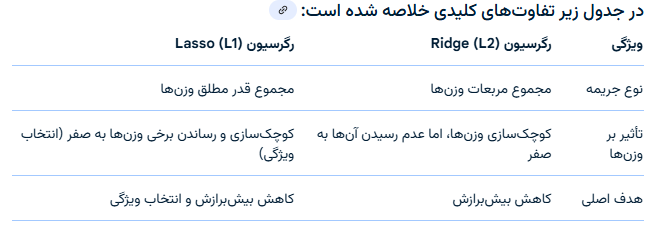

In [16]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# داده نمونه
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([50, 55, 65, 70, 80])

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)

print("Ridge coef:", ridge.coef_, "Intercept:", ridge.intercept_)
print("Lasso coef:", lasso.coef_, "Intercept:", lasso.intercept_)


Ridge coef: [8.83883476] Intercept: 64.0
Lasso coef: [10.50660172] Intercept: 64.0


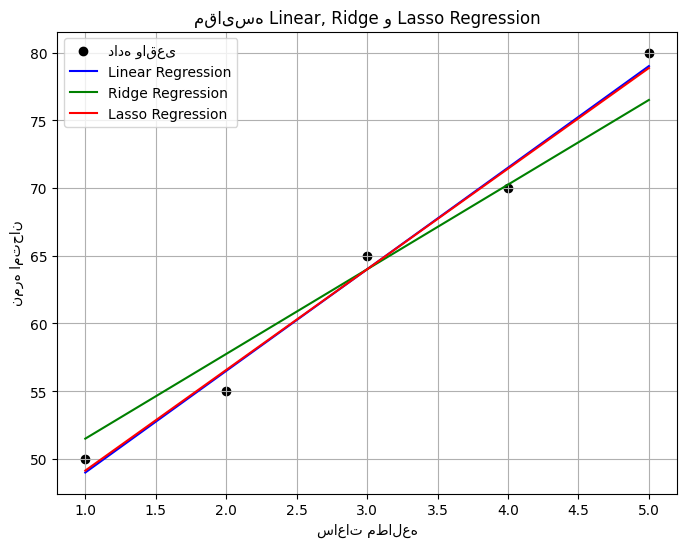

Linear: 64.0 10.606601717798213
Ridge: 64.0 8.838834764831844
Lasso: 64.0 10.506601717798214


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# داده‌های مثال (ساعات مطالعه و نمره امتحان)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([50, 55, 65, 70, 80])

# استانداردسازی ویژگی‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# مدل‌ها
linear_model = LinearRegression().fit(X_scaled, y)
ridge_model = Ridge(alpha=1.0).fit(X_scaled, y)
lasso_model = Lasso(alpha=0.1).fit(X_scaled, y)

# پیش‌بینی برای بازه پیوسته
X_test = np.linspace(1, 5, 100).reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# رسم نمودار
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='black', label='داده واقعی')
plt.plot(X_test, y_pred_linear, label='Linear Regression', color='blue')
plt.plot(X_test, y_pred_ridge, label='Ridge Regression', color='green')
plt.plot(X_test, y_pred_lasso, label='Lasso Regression', color='red')
plt.xlabel("ساعات مطالعه")
plt.ylabel("نمره امتحان")
plt.title("مقایسه Linear, Ridge و Lasso Regression")
plt.legend()
plt.grid(True)
plt.show()

# چاپ ضرایب
print("Linear:", linear_model.intercept_, linear_model.coef_[0])
print("Ridge:", ridge_model.intercept_, ridge_model.coef_[0])
print("Lasso:", lasso_model.intercept_, lasso_model.coef_[0])
